In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
Web_data_1 = pd.read_csv('/Users/adamaskari/Downloads/df_final_web_data_pt_1.txt')
Web_data_2 = pd.read_csv('/Users/adamaskari/Downloads/df_final_web_data_pt_2.txt')
Final_demo = pd.read_csv('/Users/adamaskari/Downloads/df_final_demo.txt')
Clients = pd.read_csv('/Users/adamaskari/Downloads/df_final_experiment_clients.txt')
combined_df = pd.concat([Web_data_1, Web_data_2], ignore_index=True)
merged = combined_df.merge(Clients, on='client_id', how='inner')
df = merged.merge(Final_demo, on='client_id', how='inner')
df.drop_duplicates()

bins = [0, 12, 17, 24, 34, 44, 54, 64, 74, 100]
labels = ['0-12', '13-17', '18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75+']
df['age_group'] = pd.cut(df['clnt_age'], bins=bins, labels=labels, right=True, include_lowest=True)
patient = df[['client_id', 'clnt_age', 'gendr', 'Variation', 'age_group', 'process_step']]
patient.drop_duplicates()

Test = patient[patient['Variation'] == 'Test']
Control = patient[patient['Variation'] == 'Control']

Test['age_group'], Test['gendr'].value_counts().sort_index()
Control['age_group'], Control['gendr'].value_counts().sort_index()

confirmed_df1 = Test[Test['process_step'] == 'confirm']
confirmed_counts_test = confirmed_df1['client_id'].value_counts()
confirmed_Test = confirmed_counts_test.reset_index()
confirmed_Test.columns = ['client_id', 'confirm']

confirmed_control_1 = Control[Control['process_step'] == 'confirm']
confirmed_control_counts = confirmed_control_1['client_id'].value_counts()
confirmed_Control = confirmed_control_counts.reset_index()
confirmed_Control.columns = ['client_id', 'confirm']

In [10]:
Control_total = len(Control)
C_confirmed = (Control['process_step'] == 'confirm').sum()
C_Completion_rate = (C_confirmed/Control_total)* 100
print(C_Completion_rate)

12.201837420362187


In [11]:
Test_total = len(Test)
T_confirmed = (Test['process_step'] == 'confirm').sum()
T_Completion_rate = (T_confirmed/Test_total)* 100
print(T_Completion_rate)

14.462993471916871


In [12]:
confirmed_df = df[df['process_step'] == 'confirm']
confirmed_counts = confirmed_df['client_id'].value_counts()
confirmed_counts = confirmed_counts.reset_index()
confirmed_counts.columns = ['client_id', 'confirm']

df_total = len(df)
df_confirmed = (df['process_step'] == 'confirm').sum()
df_Completion_rate = (df_confirmed/df_total)* 100
print(df_Completion_rate)

13.462611514101964


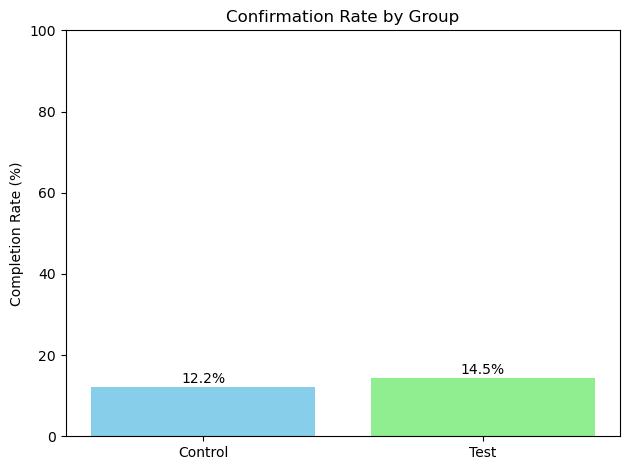

In [60]:

T_total = len(Test)
T_confirmed = (Test['process_step'] == 'confirm').sum()
T_rate = (T_confirmed / T_total) * 100

C_total = len(Control)
C_confirmed = (Control['process_step'] == 'confirm').sum()
C_rate = (C_confirmed / C_total) * 100

labels = ['Control', 'Test']
rates = [C_rate, T_rate]

plt.bar(labels, rates, color=['skyblue', 'lightgreen'])
plt.ylabel('Completion Rate (%)')
plt.title('Confirmation Rate by Group')
plt.ylim(0, 100)

for i, rate in enumerate(rates):
    plt.text(i, rate + 1, f'{rate:.1f}%', ha='center')

plt.tight_layout()
plt.show()

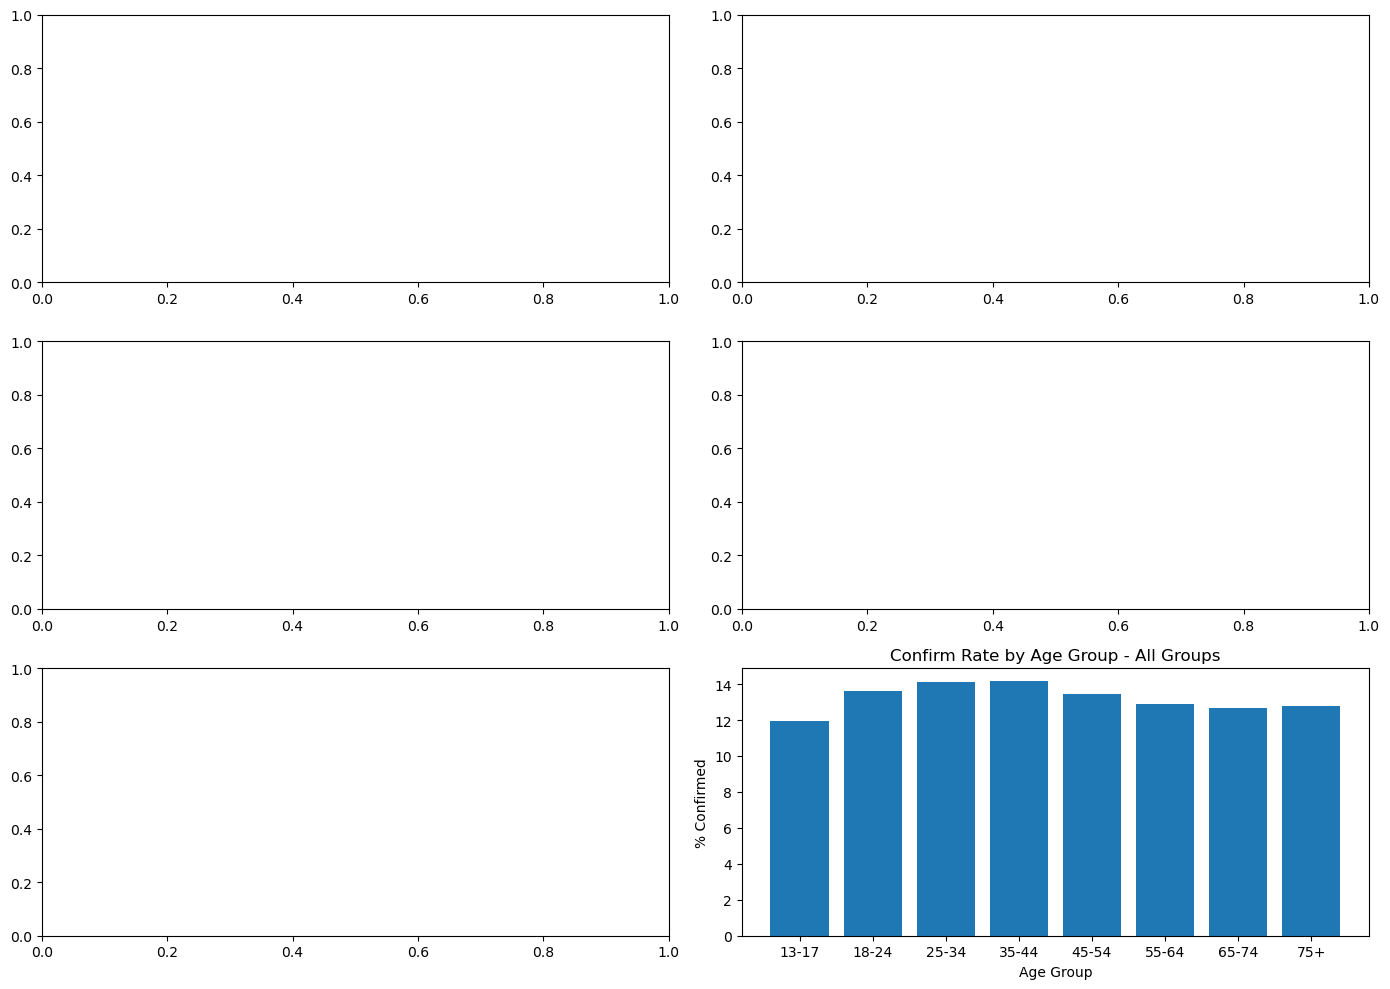

In [48]:
fig, axs = plt.subplots(3, 2, figsize=(14, 10))

confirm_rate3 = (
    df[df['process_step'] == 'confirm']
    .groupby('age_group', observed=True)
    .size() / df.groupby('age_group', observed=True).size()
) * 100

axs[2, 1].bar(confirm_rate3.index.astype(str), confirm_rate3.values)
axs[2, 1].set_title('Confirm Rate by Age Group - All Groups')
axs[2, 1].set_ylabel('% Confirmed')
axs[2, 1].set_xlabel('Age Group')

plt.tight_layout()
plt.show()

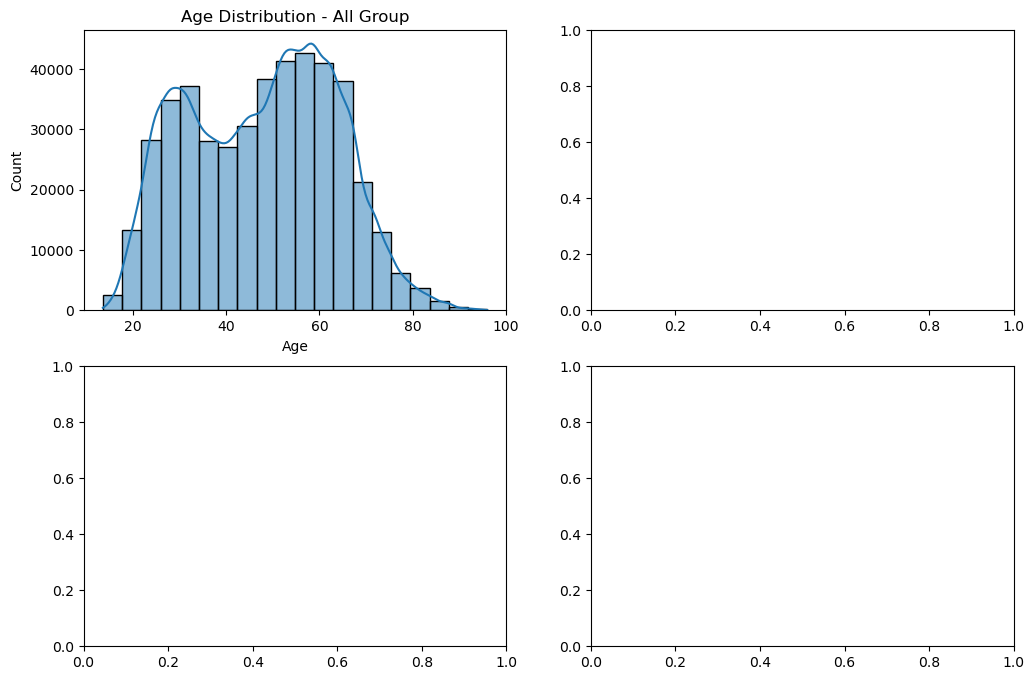

In [51]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

sns.histplot(df['clnt_age'], kde=True, bins=20, ax=axs[0, 0])
axs[0, 0].set_title('Age Distribution - All Group')
axs[0, 0].set_xlabel('Age')
plt.show()

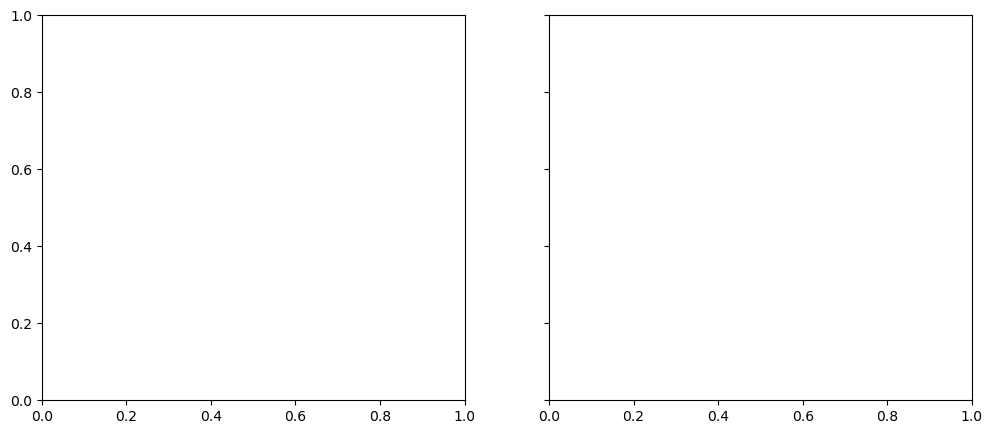

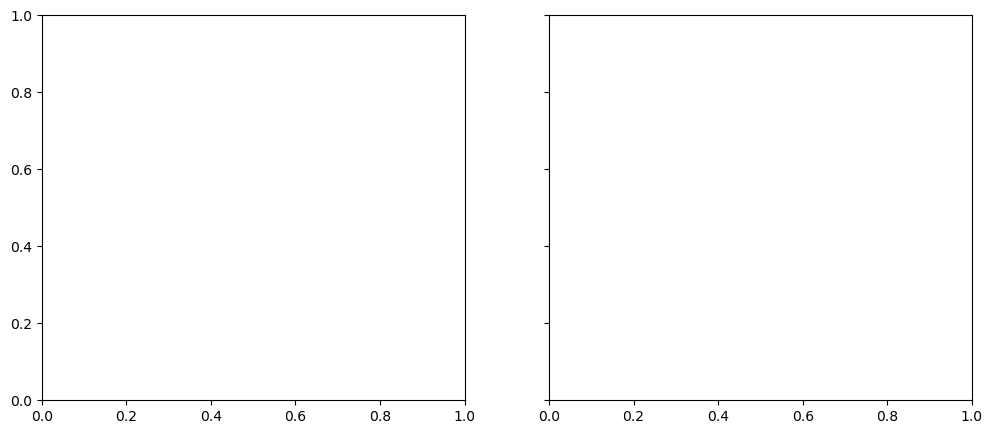

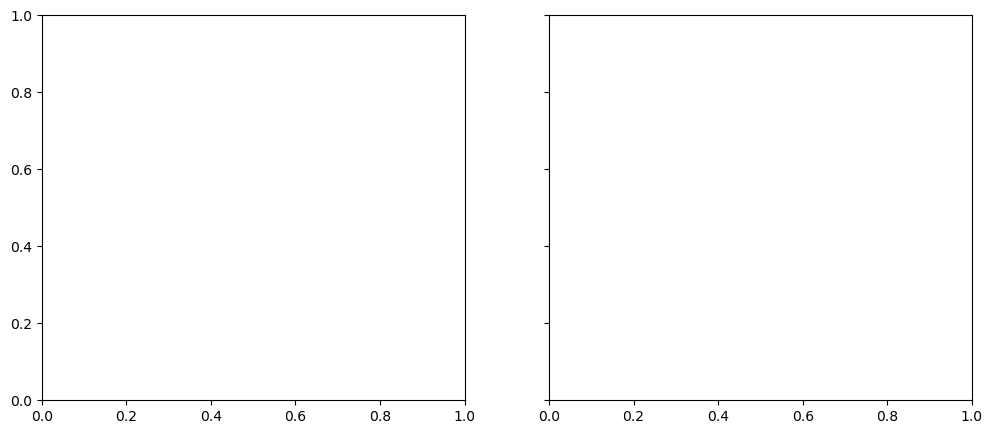

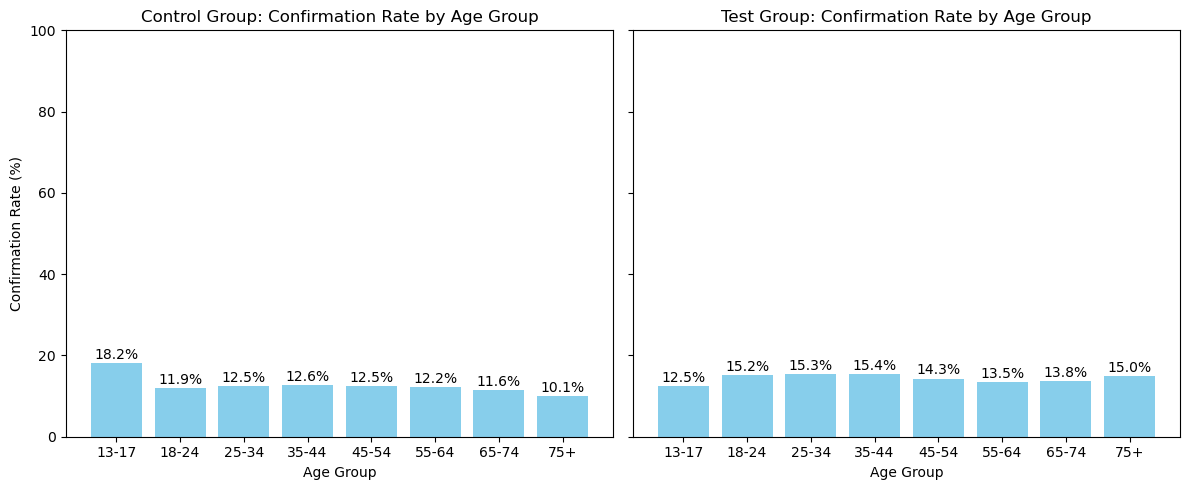

In [66]:
control_confirm_rate = (
    Control[Control['process_step'] == 'confirm']
    .groupby('age_group', observed=True)
    .size() / Control.groupby('age_group', observed=True).size()
) * 100

test_confirm_rate = (
    Test[Test['process_step'] == 'confirm']
    .groupby('age_group', observed=True)
    .size() / Test.groupby('age_group', observed=True).size()
) * 100

import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

axs[0].bar(control_confirm_rate.index.astype(str), control_confirm_rate.values, color='skyblue')
axs[0].set_title('Control Group: Confirmation Rate by Age Group')
axs[0].set_xlabel('Age Group')
axs[0].set_ylabel('Confirmation Rate (%)')
axs[0].set_ylim(0, 100)

for i, rate in enumerate(control_confirm_rate.values):
    axs[0].text(i, rate + 1, f'{rate:.1f}%', ha='center')

axs[1].bar(test_confirm_rate.index.astype(str), test_confirm_rate.values, color='skyblue')
axs[1].set_title('Test Group: Confirmation Rate by Age Group')
axs[1].set_xlabel('Age Group')
axs[1].set_ylim(0, 100)

for i, rate in enumerate(test_confirm_rate.values):
    axs[1].text(i, rate + 1, f'{rate:.1f}%', ha='center')

plt.tight_layout()
plt.show()